In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
from matplotlib.pyplot import figure
from scipy.stats import ttest_ind, ttest_rel
import scipy
import pandas
import numpy as np
from scipy.integrate import simps
from collections import defaultdict
import glob, os

In [11]:
def rec_dd():
    return defaultdict(rec_dd)

all_readouts = rec_dd()

"""
"apk_name": {
    "AOT": {
        "INSTALL": {
            "A1": 00,
            "A2": 01,
        },
        "EXEC": {
            "A1": 001,
            "A2": 002,
        }
    }
}
"""

for file in glob.glob("results/*.csv"):
    if os.path.getsize(file) == 0:
        continue
    tmp = file.split("_")
    package = tmp[1]
    test_type = tmp[2]
    test_env = tmp[3]
    test_stage = tmp[4]
    test_device = tmp[5].split(".")[0]
    
    slice_off_L = 0
    slice_off_R = -1

    csv = pandas.read_csv(file)
    timestamps = round(csv["timestamp"] - csv["timestamp"][0])[slice_off_L:slice_off_R]
    timestamps_true = [x for x in range(1, int(timestamps.values[-1] + 1))]
    power = (abs(csv["current"]) * csv["voltage"] / 10**12)[slice_off_L:slice_off_R]
    power_interpol = np.interp(timestamps_true, timestamps, power)
    
    batt_lvl = csv["level"][slice_off_L:slice_off_R]
    batt_lvl_interpol = np.interp(timestamps_true, timestamps, batt_lvl)
    if (batt_lvl_interpol[-1] != batt_lvl_interpol[-1]):
        print(file)
        print(batt_lvl, batt_lvl_interpol)
    
    cpu_t = csv["cpu_t"][slice_off_L:slice_off_R] / 1000
    cpu_t_interpol = np.interp(timestamps_true, timestamps, cpu_t)
        
    test_stage_int = int(test_stage[1:]) 
    all_readouts[package][test_env][test_type][test_stage_int]["timestamps"] = timestamps_true
    all_readouts[package][test_env][test_type][test_stage_int]["power"] = power_interpol
    all_readouts[package][test_env][test_type][test_stage_int]["batt_lvl"] = batt_lvl_interpol
    all_readouts[package][test_env][test_type][test_stage_int]["cpu_t"] = cpu_t_interpol
    


****************************************************************************************************
com.primatelabs.geekbench5


No handles with labels found to put in legend.


EXEC_JIT			EXEC_AOT	
1714.00230175000024246401		1688.36721325000007709605		97.0	98.0
1738.23868799999991097138		1737.25147659999993265956		94.0	95.0
1725.23664175000021714368		1738.40810609999994085229		90.0	92.0
1730.32767224999997779378		1733.46641975000011370867		86.0	88.0
1721.38753405000011298398		1723.01824624999994739483		83.0	85.0
1722.84547210000027916976		1728.56320660000005773327		79.0	81.0
1722.70947479999995266553		1716.14115015000015773694		74.0	78.0
1714.05916884999987814808		1723.91751130000011471566		70.0	74.0
1701.21015145000001211884		1730.81856805000006716000		66.0	70.0
1703.50144629999977041734		1706.32645014999980048742		61.0	66.0
1696.72168005000003176974		1723.59538944999985687900		56.0	62.0
1687.53444679999984145979		1715.63461980000010953518		51.0	58.0
1685.50456889999986742623		1719.64728659999991577934		46.0	53.0
1687.25196660000005977054		1705.15888345000007575436		41.0	48.0
1663.67952829999990171927		1714.02376675000004979665		35.0	43.0
1679.78398915000002

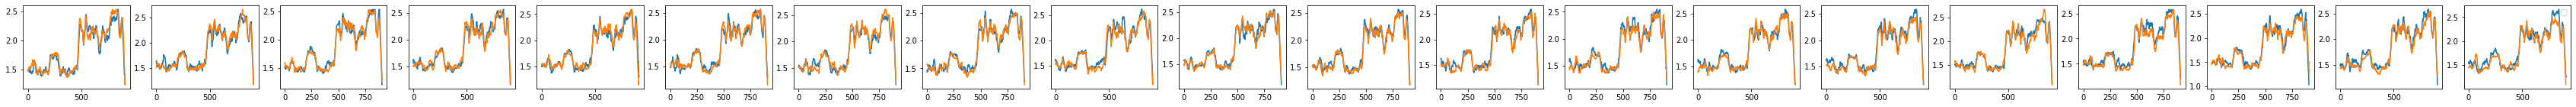

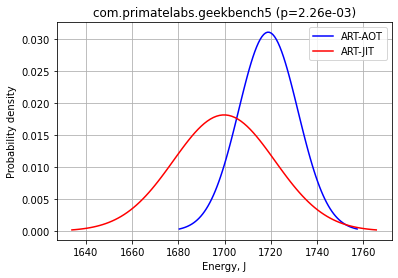

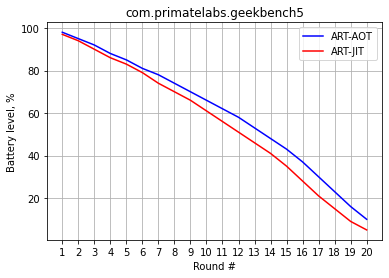


****************************************************************************************************
com.andromeda.androbench2


No handles with labels found to put in legend.


EXEC_JIT			EXEC_AOT	
446.63272569999992356315		456.38070199999998521889		100.0	100.0
460.16924530000000004293		456.54579895000000533400		99.0	100.0
459.58946700000001328590		467.75451980000002549787		98.0	100.0
450.59323930000005020702		472.90013265000004594185		97.0	99.0
465.02078775000001087392		459.45337954999996554761		97.0	98.0
449.19816520000000537038		461.77781064999999216525		96.0	97.0
445.76175380000006498449		474.21131774999997787745		95.0	97.0
446.90239050000002407614		473.15113340000004882313		94.0	96.0
453.13835819999997056584		459.44222484999994549071		93.0	95.0
462.48210004999998545827		454.89108025000001589433		92.0	94.0
448.75146784999998317289		467.97866304999996600600		91.0	93.0
456.12360039999992977755		462.80145090000002028319		90.0	92.0
455.46368620000004057147		459.75081125000002657544		89.0	92.0
455.76556080000000292785		454.27450264999993123638		88.0	91.0
454.65388845000001083463		467.69292194999997036575		87.0	90.0
451.14249314999995021935		461.697158600000022

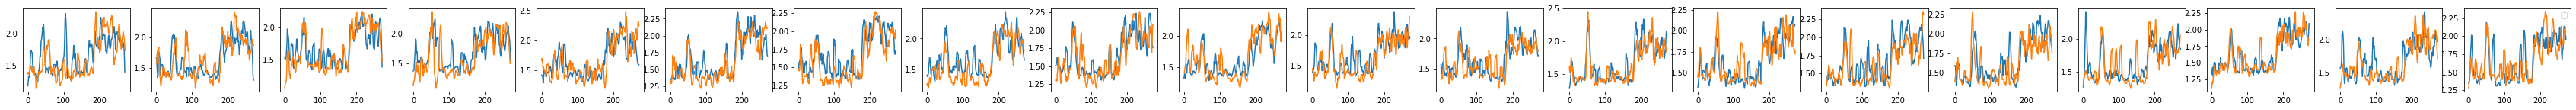

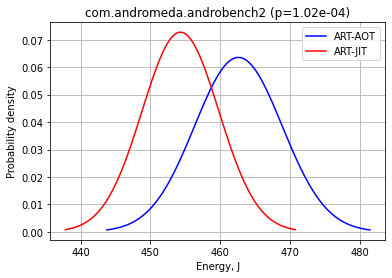

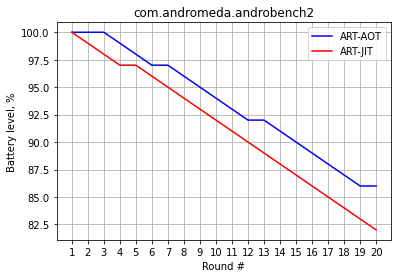


****************************************************************************************************
com.rightware.BasemarkOSII


No handles with labels found to put in legend.


EXEC_JIT			EXEC_AOT	
700.56163949999995566031		698.41209595000009358046		100.0	100.0
705.81885325000007469498		712.37543729999993047386		99.0	99.0
708.59868019999998978165		709.23097050000001217995		98.0	97.0
697.37715500000001611625		712.66131104999999479332		96.0	96.0
714.63120744999991984514		717.46290105000002768065		95.0	95.0
700.31936500000006162736		726.96335894999992888188		93.0	93.0
708.77376225000011800148		717.86892420000003767200		92.0	92.0
711.22449810000000525179		717.59367715000007592607		90.0	90.0
702.04630420000000867731		710.58898920000001453445		88.0	89.0
699.23759080000013454992		716.21351014999993367383		87.0	88.0
708.50975325000001703302		704.30395889999999781139		85.0	86.0
697.86775550000004386675		715.40567005000002609449		84.0	85.0
700.39476160000003801542		717.63289655000005495822		82.0	83.0
694.72700565000002370653		710.71450900000002093293		80.0	81.0
687.90167634999988877098		706.02031920000001719018		79.0	80.0
692.37012099999992642552		706.01259335000008832

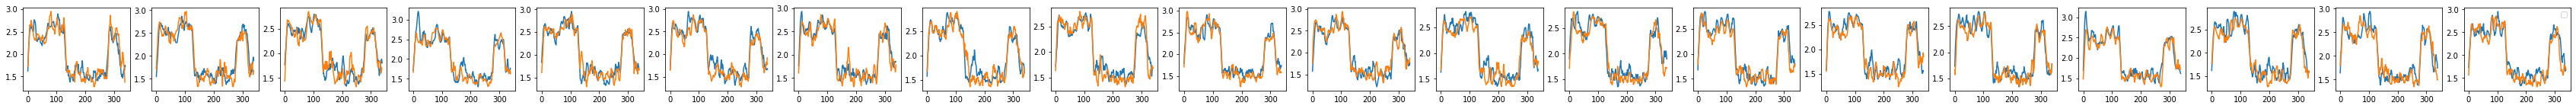

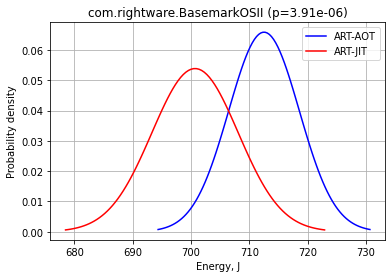

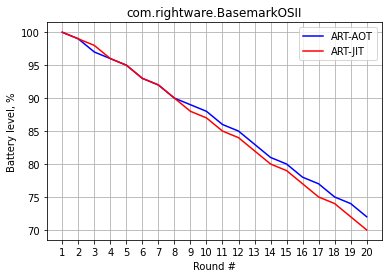


****************************************************************************************************
com.quicinc.vellamo


No handles with labels found to put in legend.


EXEC_JIT			EXEC_AOT	
875.41080875000011474185		888.18692955000005895272		98.0	98.0
878.03897884999992129451		884.39046475000009195355		96.0	96.0
879.71401909999997315026		888.62598249999996369297		95.0	94.0
890.30223315000000638975		885.65556920000005902693		93.0	92.0
884.81937295000000176515		885.29025290000004133617		91.0	90.0
901.88460429999997813866		899.91905769999993935926		89.0	88.0
879.41682510000009642681		897.10382559999993645761		88.0	86.0
871.92120754999996279366		897.54409080000004905742		86.0	84.0
894.69553760000007969211		878.47941694999997253035		84.0	82.0
883.45907490000001871522		880.03797540000005028560		82.0	80.0
873.19964055000002645102		896.51188464999995630933		80.0	78.0
913.60857690000000275177		888.13345455000001038570		78.0	75.0
883.81743125000002692104		877.88713250000000698492		76.0	73.0
883.07671945000004143367		876.76009064999993825040		74.0	71.0
881.00916555000003427267		876.69274310000002969900		72.0	69.0
880.57660665000003064051		912.2269628999999895313

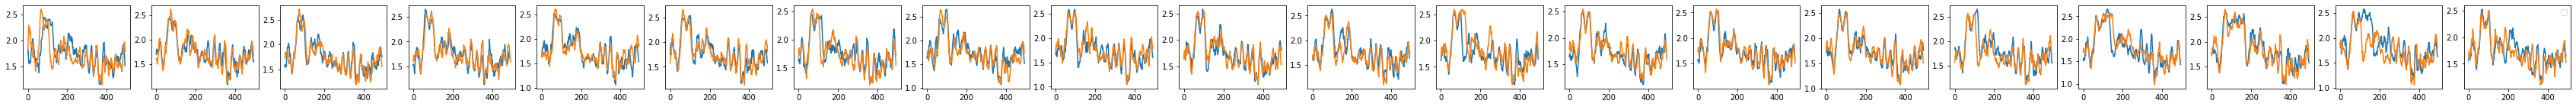

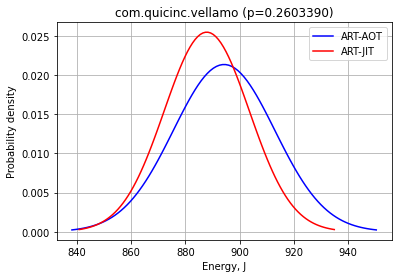

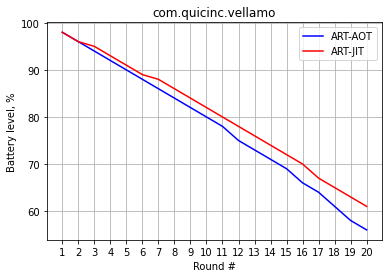


****************************************************************************************************
com.futuremark.dmandroid.application


No handles with labels found to put in legend.


EXEC_JIT			EXEC_AOT	
687.82326209999996535771		668.17552350000005390029		100.0	99.0
673.70141845000000557775		662.11021915000003446039		99.0	98.0
683.96992189999991751392		655.43419310000001587468		98.0	97.0
687.94058595000001332664		664.04363284999999450520		96.0	96.0
676.91858240000010482618		661.98848469999995813851		95.0	94.0
682.21258239999997385894		669.71410670000000209257		94.0	93.0
689.93393340000000080181		655.13220245000002250890		92.0	91.0
676.47490229999993971433		651.94776045000003250607		91.0	90.0
682.61457400000006146001		666.66590509999991809309		90.0	89.0
693.14910754999993969250		662.79905955000003814348		88.0	87.0
677.45982284999990952201		677.19786429999999199936		87.0	86.0
674.54383919999997942796		665.92396460000009028590		85.0	84.0
682.43202094999992368685		659.05994110000006003247		84.0	83.0
685.10362200000008670031		667.92974780000008649949		83.0	81.0
691.40756134999992355006		671.20489310000004934409		81.0	80.0
671.27948130000004312024		659.672510549999969953

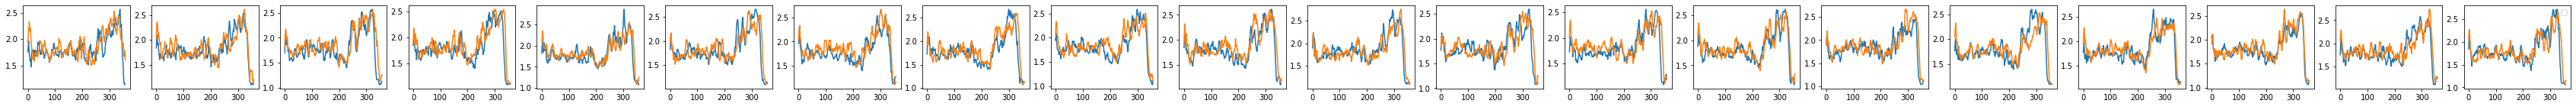

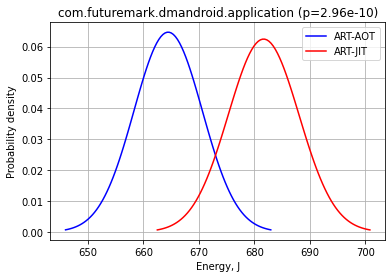

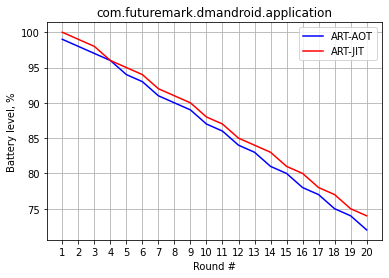


****************************************************************************************************
com.futuremark.pcmark.android.benchmark


No handles with labels found to put in legend.


EXEC_JIT			EXEC_AOT	
901.32473970000000917935		904.37440390000006118498		100.0	100.0
921.69307045000005018665		904.84865079999997306004		98.0	99.0
926.33096094999996239494		905.57138699999995878898		97.0	98.0
928.46388639999997849372		901.76086054999996122206		95.0	96.0
928.68852064999998674466		914.36923070000000279833		94.0	95.0
923.48233404999996309925		914.02893189999997503037		92.0	93.0
925.71068854999998620769		919.32677860000001146545		90.0	92.0
918.59250064999991991499		915.42254615000001649605		89.0	90.0
912.90693430000010266667		902.89847755000005236070		87.0	88.0
936.65066385000000082073		908.38745500000004540198		85.0	87.0
918.28880299999991621007		891.59024959999999282445		84.0	85.0
916.19961884999997892010		911.64571300000011433440		82.0	84.0
920.75388099999997848499		896.07670099999995727558		80.0	82.0
926.53969744999994873069		895.47669999999993706297		79.0	80.0
917.24420080000004418253		899.14557594999996581464		77.0	79.0
897.94237599999996746192		880.51165060000005269

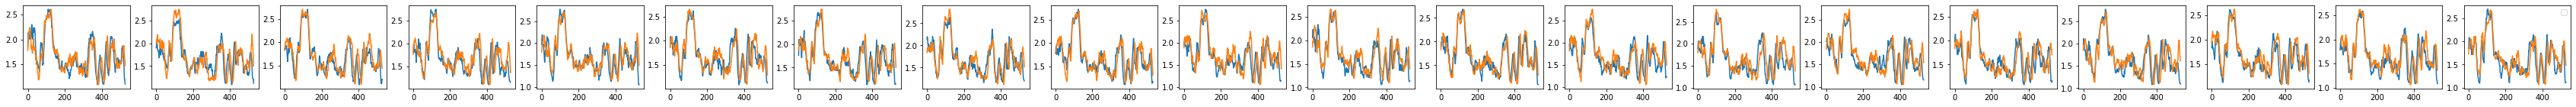

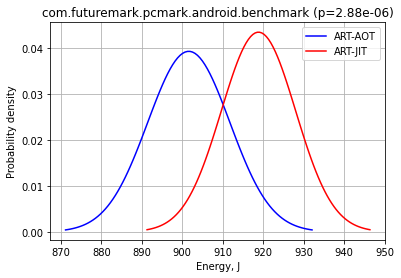

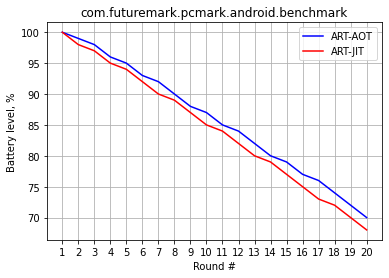

In [13]:
ROUNDS_N = 20

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

for apk in all_readouts:
    print()
    print("*"*100)
    print(apk)
        
    LIM_LEFT = 0
    LIM_RIGHT = None

    fig, axs = plt.subplots(1, ROUNDS_N, figsize=(60,2))
    plt.legend(loc="upper right")

    print("EXEC_JIT\t\t\tEXEC_AOT\t")
    
    jit_energies = list()
    aot_energies = list()
    
    jit_batt_lvls = list()
    aot_batt_lvls = list()
    
    for i in range(1, ROUNDS_N + 1):
        jit_energy = -1
        jit_batt = -1
        aot_energy = -1
        aot_batt = -1
         
        _x = all_readouts[apk]["AOT"]["EXEC"][i]["timestamps"]#[LIM_LEFT:LIM_RIGHT]
        
        if len(_x) > 0:
            window = int(len(_x) / 40)
            _y = all_readouts[apk]["AOT"]["EXEC"][i]["power"]#[LIM_LEFT:LIM_RIGHT]
            _y_ma = moving_average(_y, window)            
            aot_energy = np.sum(_y)
            aot_batt = all_readouts[apk]["AOT"]["EXEC"][i]["batt_lvl"][-1]
            #axs[i-1].plot(_y)
            axs[i-1].plot(_y_ma, label="AOT")
            aot_energies.append(float(aot_energy))
            aot_batt_lvls.append(int(aot_batt))
            
        _x = all_readouts[apk]["JIT"]["EXEC"][i]["timestamps"]#[LIM_LEFT:LIM_RIGHT]   
        if len(_x) > 0:
            window = int(len(_x) / 40)
            _y = all_readouts[apk]["JIT"]["EXEC"][i]["power"]#[LIM_LEFT:LIM_RIGHT]
            _y_ma = moving_average(_y, window)
            jit_energy = np.sum(_y)
            jit_batt = all_readouts[apk]["JIT"]["EXEC"][i]["batt_lvl"][-1]
            #axs[i-1].plot(_y)
            axs[i-1].plot(_y_ma, label="JIT")
            jit_energies.append(float(jit_energy))
            jit_batt_lvls.append(int(jit_batt))
        
        print("{}\t\t{}\t\t{}\t{}".format(format(jit_energy, '.20f'), format(aot_energy, '.20f'), jit_batt, aot_batt))
    
    stat_test = ttest_ind(aot_energies, jit_energies, equal_var=True)
    print(stat_test)
    aot_mean, aot_std = np.mean(aot_energies), np.std(aot_energies)
    jit_mean, jit_std = np.mean(jit_energies), np.std(jit_energies)
    print("JIT mean: {} sd: {}\nAOT mean: {} sd: {}".format(jit_mean, jit_std, aot_mean, aot_std))
    jit_ci = mean_confidence_interval(jit_energies)
    aot_ci = mean_confidence_interval(aot_energies)
    print("JIT conf: {}\nAOT conf: {}".format(jit_ci, aot_ci))
    
    f = plt.figure()
    aot_norm = np.linspace(aot_mean - 3*aot_std, aot_mean + 3*aot_std, 100)
    plt.plot(aot_norm, scipy.stats.norm.pdf(aot_norm, aot_mean, aot_std), "-b", label="ART-AOT")
    jit_norm = np.linspace(jit_mean - 3*jit_std, jit_mean + 3*jit_std, 100)
    plt.plot(jit_norm, scipy.stats.norm.pdf(jit_norm, jit_mean, jit_std), "-r", label="ART-JIT")
    plt.grid()
    plt.legend(loc="upper right")
    plt.xlabel('Energy, J')
    plt.ylabel('Probability density')
    p_val_fmt = '{:.2e}'.format(stat_test[1]) if stat_test[1] < 0.05 else format(stat_test[1], '.7f')
    plt.title("{} (p={})".format(apk, p_val_fmt))
    plt.show()
    f.savefig("bell_{}.png".format(apk), bbox_inches='tight', dpi=200)
    
    f2 = plt.figure()
    plt.plot(range(1, ROUNDS_N+1), aot_batt_lvls, "-b", label="ART-AOT")
    plt.plot(range(1, ROUNDS_N+1), jit_batt_lvls, "-r", label="ART-JIT")
    plt.xticks(range(1, 21))
    plt.grid()
    plt.legend(loc="upper right")
    plt.xlabel('Round #')
    plt.ylabel('Battery level, %')
    plt.title(apk)
    plt.show()
    f2.savefig("batt_{}.png".format(apk), bbox_inches='tight', dpi=200)